In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/Users/noahpovis/Desktop/Buildweek22/Build Week 2 /DX.csv')



In [3]:
def clean(i):
    i = i.copy()
    i.drop_duplicates(subset=['Organization Name','Funding Type'], inplace = True)
    i.drop_duplicates(keep='first', inplace= True)
    i['Raised Series A'] = np.where(i['Organization Name'].duplicated(), 1, 0)
    i.drop_duplicates(subset='Organization Name', keep='last', inplace= True)
    i['Money Raised Currency (in USD)'] = pd.to_numeric(i['Money Raised Currency (in USD)'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i['Announced Date'] = pd.to_datetime(i['Announced Date'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)'], errors='coerce')
    i  = i[i['Funding Type'] != 'Series A'] 
    return i 

In [4]:
df_clean = clean(df)

In [5]:
def split_columns(text):
    text = text.copy()
    # new data frame with split value columns 
    new = text["Organization Industries"].str.split(",", n = 7, expand = True) 
    # making separate first name column from new data frame 
    text["Primary Industry"]= new[0] 
    # making separate last name column from new data frame 
    text["Sub_Ind"]= new[1] 
    text["Sub_Ind2"]= new[2]
    text["Sub_Ind3"]= new[3]
    text["Sub_Ind4"]= new[4]
    text["Sub_Ind5"]= new[5]
    text["Sub_Ind6"]= new[6]
    text["Sub_Ind7"]= new[7]
    # Dropping old Name columns 
    text.drop(columns =["Organization Industries"], inplace = True)

    #same thing but for investor column 
    new1 = text["Investor Names"].str.split(",", n = 11, expand = True) 
    # making separate first name column from new data frame 
    text["Investor1"]= new1[0] 
    # making separate last name column from new data frame 
    text["Investor1"]= new1[1] 
    text["Investor2"]= new1[2]
    text["Investor3"]= new1[3]
    text["Investor4"]= new1[4]
    text["Investor5"]= new1[5]
    text["Investor6"]= new1[6]
    text["Investor7"]= new1[7]
    text["Investor8"]= new1[8]
    text["Investor9"]= new1[9]
    text["Investor10"]= new1[10]
    text["Investor11"]= new1[11]
    # Dropping old Name columns 
    text.drop(columns =["Investor Names"], inplace = True)
    text.drop(columns =["Lead Investors"], inplace = True)
    text.drop(columns =["Number of Investors"], inplace = True)
    text.drop(columns =["Transaction Name"], inplace = True)
    text.drop(columns =["Transaction Name URL"], inplace = True)
    text.drop(columns =["Organization Name URL"], inplace = True)
    text.drop(columns =["Funding Type"], inplace = True)
    text.drop(columns =["Money Raised Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount Currency"], inplace = True)
    text.drop(columns =["Total Funding Amount"], inplace = True)
    text.drop(columns =["Money Raised"], inplace = True)
    text = text[text['Money Raised Currency (in USD)'].notna()]
    text = text[text['Organization Location'].notna()]
    text = text[text['Primary Industry'].notna()]
    text = text[text['Money Raised Currency (in USD)'].notna()]

    



    return text 
    


In [6]:
df_split = split_columns(df_clean)

In [7]:
def clean_null(a):
    a['Primary Industry'].fillna('Not Listed', inplace = True)
    a['Sub_Ind'].fillna('Not Listed', inplace = True)
    a['Sub_Ind2'].fillna('Not Listed', inplace = True)
    a['Sub_Ind3'].fillna('Not Listed', inplace = True)
    a['Sub_Ind4'].fillna('Not Listed', inplace = True)
    a['Sub_Ind5'].fillna('Not Listed', inplace = True)
    a['Sub_Ind6'].fillna('Not Listed', inplace = True)
    a['Sub_Ind7'].fillna('Not Listed', inplace = True)
    a['Investor1'].fillna('Not Listed', inplace = True)
    a['Investor2'].fillna('Not Listed', inplace = True)
    a['Investor3'].fillna('Not Listed', inplace = True)
    a['Investor4'].fillna('Not Listed', inplace = True)
    a['Investor5'].fillna('Not Listed', inplace = True)
    a['Investor6'].fillna('Not Listed', inplace = True)
    a['Investor7'].fillna('Not Listed', inplace = True)
    a['Investor8'].fillna('Not Listed', inplace = True)
    a['Investor9'].fillna('Not Listed', inplace = True)
    a['Investor10'].fillna('Not Listed', inplace = True)
    a['Investor11'].fillna('Not Listed', inplace = True)
    
    return a 





In [8]:
data = clean_null(df_split)
data.sample(5)

,Organization Name,Money Raised Currency (in USD),Announced Date,Total Funding Amount Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
22919,Spiritrade,1000000.0,2020-01-01,1000000.0,Spiritrade is an online trading platform for t...,"London, England, United Kingdom, Europe",0,E-Commerce,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
8422,ChainDesk,1473000.0,2019-01-21,1473000.0,ChainDesk is a blockchain education platform f...,"Beijing, Beijing, China, Asia",0,Blockchain,Not Listed,Not Listed,...,Youma Yuanchuang,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
11123,See More,283329.0,2018-11-26,283329.0,See More Specializes in augmented reality.,"Belval, Luxembourg, Luxembourg, Europe",0,Virtual Reality,Not Listed,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
26184,ConexED,812000.0,2019-09-01,1137000.0,An Academic Communication System that enables ...,"Salt Lake City, Utah, United States, North Ame...",0,EdTech,Education,SaaS,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
19744,Digible,250000.0,2018-04-09,250000.0,A Denver based developing predictive marketing...,"Denver, Colorado, United States, North America",0,Advertising,Marketing,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed


In [9]:
data.isnull().sum()

Organization Name                         0
Money Raised Currency (in USD)            0
Announced Date                            0
Total Funding Amount Currency (in USD)    0
Organization Description                  0
Organization Location                     0
Raised Series A                           0
Primary Industry                          0
Sub_Ind                                   0
Sub_Ind2                                  0
Sub_Ind3                                  0
Sub_Ind4                                  0
Sub_Ind5                                  0
Sub_Ind6                                  0
Sub_Ind7                                  0
Investor1                                 0
Investor2                                 0
Investor3                                 0
Investor4                                 0
Investor5                                 0
Investor6                                 0
Investor7                                 0
Investor8                       

In [10]:
#convert all to categories 
data["Organization Name"] = data["Organization Name"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Description"] = data["Organization Description"].astype('category')
data["Organization Location"] = data["Organization Location"].astype('category')
data["Primary Industry"] = data["Primary Industry"].astype('category')
data["Sub_Ind"] = data["Sub_Ind"].astype('category')
data["Sub_Ind2"] = data["Sub_Ind2"].astype('category')
data["Sub_Ind3"] = data["Sub_Ind3"].astype('category')
data["Sub_Ind4"] = data["Sub_Ind4"].astype('category')
data["Sub_Ind5"] = data["Sub_Ind5"].astype('category')
data["Sub_Ind6"] = data["Sub_Ind6"].astype('category')
data["Sub_Ind7"] = data["Sub_Ind7"].astype('category')
data["Investor1"] = data["Investor1"].astype('category')
data["Investor2"] = data["Investor2"].astype('category')
data["Investor3"] = data["Investor3"].astype('category')
data["Investor4"] = data["Investor4"].astype('category')
data["Investor5"] = data["Investor5"].astype('category')
data["Investor6"] = data["Investor6"].astype('category')
data["Investor7"] = data["Investor7"].astype('category')
data["Investor8"] = data["Investor8"].astype('category')
data["Investor9"] = data["Investor9"].astype('category')
data["Investor10"] = data["Investor10"].astype('category')
data["Investor11"] = data["Investor11"].astype('category')

In [11]:
data.dtypes

Organization Name                               category
Money Raised Currency (in USD)                   float64
Announced Date                            datetime64[ns]
Total Funding Amount Currency (in USD)           float64
Organization Description                        category
Organization Location                           category
Raised Series A                                    int64
Primary Industry                                category
Sub_Ind                                         category
Sub_Ind2                                        category
Sub_Ind3                                        category
Sub_Ind4                                        category
Sub_Ind5                                        category
Sub_Ind6                                        category
Sub_Ind7                                        category
Investor1                                       category
Investor2                                       category
Investor3                      

In [40]:
data.describe()

,Money Raised Currency (in USD),Total Funding Amount Currency (in USD),Raised Series A
count,1.262300e+04,1.262300e+04,12623.000000
mean,1.597823e+06,3.507527e+06,0.057514
std,3.862080e+06,1.253452e+07,0.232831
min,2.770000e+02,3.140000e+02,0.000000
25%,2.250000e+05,3.345935e+05,0.000000
50%,7.750000e+05,1.127549e+06,0.000000
75%,2.000000e+06,3.000000e+06,0.000000
max,2.944858e+08,5.570000e+08,1.000000


In [15]:
raised = data[data['Raised Series A'] == 1] 

In [16]:
raised.sample(5)

,Organization Name,Money Raised Currency (in USD),Announced Date,Total Funding Amount Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,...,Investor2,Investor3,Investor4,Investor5,Investor6,Investor7,Investor8,Investor9,Investor10,Investor11
7160,Ayenda Rooms,1200000.0,2019-03-13,9900000.0,Fastest growing budget hotel chain.,"Medellín, Antioquia, Colombia, South America",1,Hospitality,Hotel,Travel,...,SoftBank,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
8269,atta,1840711.0,2019-01-15,5043805.0,Flight and accommodation metasearch that lever...,"Tokyo, Tokyo, Japan, Asia",1,Internet,Travel,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
10888,Lendflo,605743.0,2018-12-01,5786544.0,Invoice financing platform leveraging technolo...,"London, England, United Kingdom, Europe",1,Commercial Lending,Financial Services,FinTech,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
4432,Empower,318500.0,2019-06-17,488500.0,Empower is transforming the “Gig Economy” with...,"Mclean, Virginia, United States, North America",1,SaaS,Software,Not Listed,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed
12392,Papa,2400000.0,2018-10-04,13205000.0,Papa is a platform that connects college stude...,"Miami, Florida, United States, North America",1,Elderly,Health Care,Transportation,...,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed,Not Listed


In [17]:
#the baseline 
data['Raised Series A'].value_counts(normalize=True)

0    0.942486
1    0.057514
Name: Raised Series A, dtype: float64

In [18]:
x = data.drop(columns=['Raised Series A', 'Announced Date'])
y = data['Raised Series A']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [20]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((8457, 24), (4166, 24), (8457,), (4166,))

In [21]:
X_train.drop(columns =["Total Funding Amount Currency (in USD)"], inplace = True)
X_test.drop(columns =["Total Funding Amount Currency (in USD)"], inplace = True)

In [22]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=100,
                  random_state=42,
                  n_jobs=-1          
)
)




pipe = pipeline.fit(X_train, y_train);


In [23]:
xgb_train = pipe.predict(X_train)
print("XGBoost Classifier val Recall Accuracy:", recall_score(y_train, xgb_train))
print("XGBoost Classifier val Accuracy Score:", accuracy_score(y_train, xgb_train))
print("XGBoost Classifier val Precision Accuracy:", precision_score(y_train, xgb_train))

XGBoost Classifier val Recall Accuracy: 0.7728194726166329
XGBoost Classifier val Accuracy Score: 0.9867565330495448
XGBoost Classifier val Precision Accuracy: 1.0


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import auc

In [28]:
probs = pipe.predict_proba(X_test)
probs = probs[:, 1]

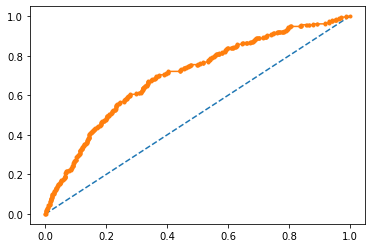

AUC: 0.701


In [35]:
#ROC Curve 
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_score)

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)
auc_score = auc(recall, precision)

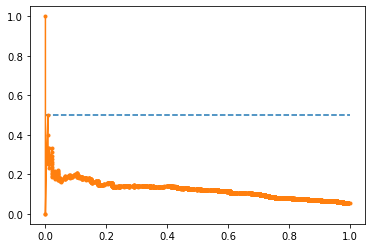

AUC: 0.124


In [39]:
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
pyplot.show()
print('AUC: %.3f' % auc_score)

In [25]:
#run test predictions 
predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.95      0.98      0.96      3933
           1       0.18      0.06      0.09       233

    accuracy                           0.93      4166
   macro avg       0.56      0.52      0.53      4166
weighted avg       0.90      0.93      0.92      4166



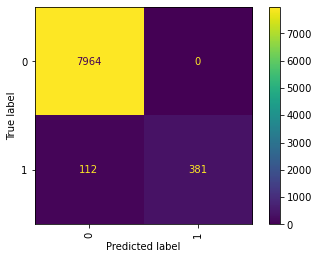

In [26]:
# Plot a confusion matrix for your Tanzania Waterpumps model.
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe, X_train, y_train, values_format='.0f', xticks_rotation='vertical')

In [ ]:
#MORE FEATURE ENGINNERING 

In [ ]:
#look into creating an optimal threshold and create a few graphs like confusion matrix, roc-auc curve 
#still need to do nlp 


In [41]:
document_lengths = np.array(list(map(len, data['Organization Description'].str.split(' '))))

print("The average number of words in a description is: {}.".format(np.mean(document_lengths)))
print("The minimum number of words in a description is: {}.".format(min(document_lengths)))
print("The maximum number of words in a description is: {}.".format(max(document_lengths)))

The average number of words in a description is: 13.168660381842669.
The minimum number of words in a description is: 1.
The maximum number of words in a description is: 28.


In [55]:
pd.set_option('display.max_colwidth', -1)

In [60]:
query = data.loc[data['Raised Series A'] == 0, 'Organization Description']
query.sample(5)

8294     Business platform for mental health clinics and prationers                                                             
3886     Hero Labs develops technologies that help prevent water leaks.                                                         
18084    DLG & Associates is a Health Care company.                                                                             
15742    Mi Padrino is an online mobile application that makes planning and paying for Hispanic celebrations easy and effective.
22929    The Nurturing Co is inspire personal reduce and remove change towards a no-plastic waste future.                       
Name: Organization Description, dtype: category
Categories (12621, object): [A developing a comprehensive verification framework for Intelligent Autonomous Systems ., A fashion enterprise that provides a launchpad to fashion talent and brands using a tech enabled platform, A precise and portable in-vitro device that brings efficiency to the hematologica

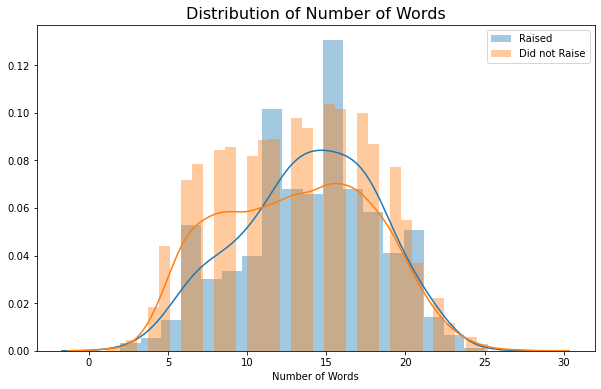

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax, label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

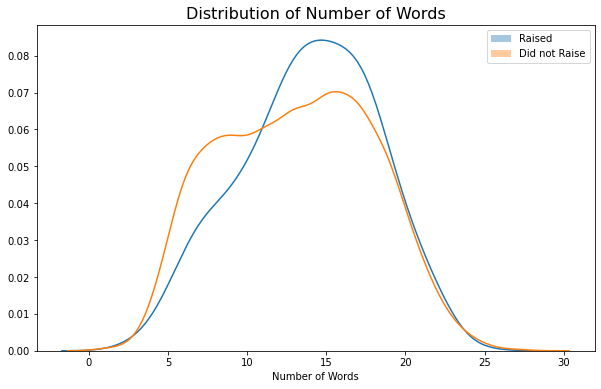

In [64]:
LogMin, LogMax = np.log10(data['Raised Series A'].min()),np.log10(data['Raised Series A'].max())
newBins = np.logspace(LogMin, LogMax,8)


fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(document_lengths[data['Raised Series A'] == 1], ax=ax,bins=newBins,label='Raised')
sns.distplot(document_lengths[data['Raised Series A'] == 0], ax=ax,bins=newBins, label='Did not Raise')

ax.set_title("Distribution of Number of Words", fontsize=16)
ax.set_xlabel("Number of Words")
plt.legend()
plt.show()

In [67]:
# Function to preprocess raw test from job description
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

# Remove extra white space
data['Organization Description'] = data['Organization Description'].apply(lambda x: ' '.join(x.split()))

# Remove punctuation and numbers
data['Organization Description'] = data['Organization Description'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
data['Organization Description'] = data['Organization Description'].str.lower()

# Lemmatize
data['Organization Description'] = data['Organization Description'].map(lambda x: lemmatize(x))

In [74]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf = tf_vectorizer.fit_transform(data['Organization Description'])
dtm_feature_names = tf_vectorizer.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf.shape))

Document Term Matrix Shape: (12623, 14556)


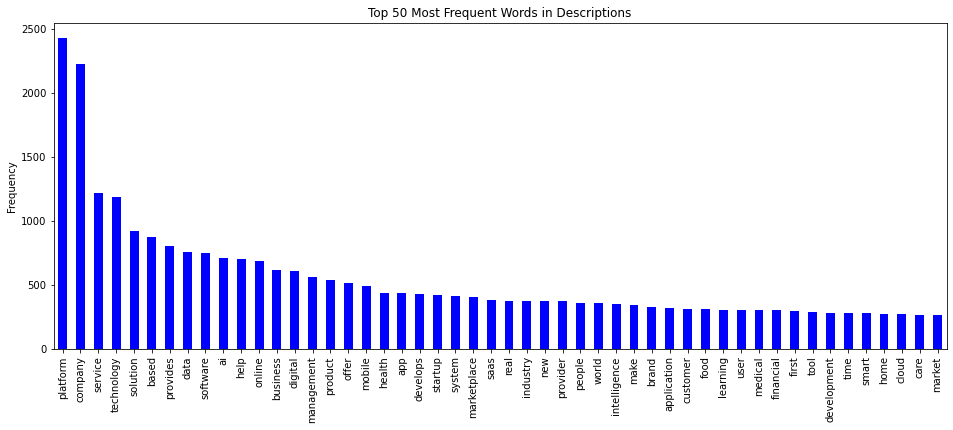

In [75]:
plt.figure(figsize=(16,6))
term_df = pd.DataFrame(dtm_tf.toarray(), columns=dtm_feature_names)
term_df.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(color='blue')
plt.title("Top 50 Most Frequent Words in Descriptions")
plt.ylabel("Frequency")
plt.show()

In [76]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(random_state=10)

In [78]:
pip install pyLDAvis

     |████████████████████████████████| 1.6 MB 650 kB/s 
     |████████████████████████████████| 186 kB 1.6 MB/s 
     |████████████████████████████████| 248 kB 902 kB/s 
     |████████████████████████████████| 829 kB 3.7 MB/s 
     |████████████████████████████████| 548 kB 3.2 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=5ae68281a74872ccd0a23a021566a16db1cc8f684cbb3f09bef436eeb7bc4ae9
  Stored in directory: /Users/noahpovis/Library/Caches/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=dfd47d93966b107eb58c69f9093552b84ae3a8052673b6b5071071e0bd268379
  Stored in directory: /Users/noahpovis/Library/Caches/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel for funcy: filename=funcy

In [79]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/noahpovis/.vscode/extensions/ms-python.python-2020.6.89148/pythonFiles/lib/python/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.043178  0.000295  1       1        12.513515
1     -0.176034  0.002560  2       1        11.535233
0     -0.007128  0.071689  3       1        11.307014
5      0.139346 -0.029077  4       1        11.068601
4      0.067286  0.167361  5       1        10.350076
6      0.058182 -0.054458  6       1        10.268643
7      0.027913 -0.099132  7       1        9.075446 
3     -0.033350 -0.090101  8       1        9.027922 
8     -0.070092  0.086956  9       1        8.047336 
2     -0.049301 -0.056092  10      1        6.806215 , topic_info=               Term         Freq        Total Category  logprob  loglift
10914  real          341.000000   341.000000   Default  30.0000  30.0000
2498   company       2019.000000  2019.000000  Default  29.0000  29.0000
3324   data          689.000000   689.000000   Default  28.0000  28.0000
6988   intelligence  319.000000   319.000000   Default  27.0000  27.0000
6040   health        400.000000   400.000000   Default  26.0000  26.0000
...       ...               ...          ...       ...      ...      ...
6156   help          39.045126    641.090272   Topic10 -5.5093  -0.1111 
2498   company       43.852952    2019.513728  Topic10 -5.3932  -1.1424 
12323  solution      36.737471    838.104278   Topic10 -5.5702  -0.4400 
8767   new           32.158436    337.971330   Topic10 -5.7033   0.3350 
12201  social        28.875696    222.376947   Topic10 -5.8110   0.6460 

[747 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
50     4      0.100415  accessory  
50     6      0.853528  accessory  
185    3      0.846478  advertiser 
185    10     0.084648  advertiser 
186    3      0.041959  advertising
...    ..          ...         ... 
14481  5      0.097302  world      
14481  6      0.322314  world      
14481  8      0.088180  world      
14481  9      0.063855  world      
14481  10     0.036488  world      

[1937 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 1, 6, 5, 7, 8, 4, 9, 3])

In [85]:
topic_df.shape

(12623, 10)

In [86]:
topic_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf.transform(dtm_tf)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

# Join topic dataframe with numerical features from Method #1
df2 = pd.concat([data, topic_df], axis=1)
print(f'Original Dataframe Shape: {data.shape}')
print(f'New Dataframe Shape: {df2.shape}\n')
df2.head()

Original Dataframe Shape: (12623, 26)
New Dataframe Shape: (12623, 36)



,Organization Name,Money Raised Currency (in USD),Announced Date,Total Funding Amount Currency (in USD),Organization Description,Organization Location,Raised Series A,Primary Industry,Sub_Ind,Sub_Ind2,...,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,Xperiti,1200000.0,2019-07-11,1400000.0,xperiti is an ai powered enterprise software designed to give investment management firm a strategic advantage in research,"New York, New York, United States, North America",0,Artificial Intelligence,Consulting,Content,...,0.354718,0.005556,0.005557,0.005559,0.005557,0.005557,0.005557,0.005558,0.600825,0.005557
1,New Age Meats,2740000.0,2019-07-24,2990000.0,new age meat focus on rapid development of healthy culitvated meat grown from animal cell instead of animal slaughter,"Berkeley, California, United States, North America",0,Biotechnology,Food and Beverage,Not Listed,...,0.006251,0.943746,0.006250,0.006250,0.006251,0.006250,0.006250,0.006250,0.006251,0.006250
2,Clever Care Health Plan,6000000.0,2019-08-07,26000000.0,clever care health plan is a healthcare company that offer medicare advantage health plan to it member,"Westminster, California, United States, North America",1,Health Care,Health Insurance,Insurance,...,0.163275,0.005264,0.005264,0.005264,0.005264,0.005264,0.005263,0.794616,0.005264,0.005263
3,Mahmee,3000000.0,2019-07-15,3000000.0,mahmee provides comprehensive personalized support and care management pregnancy through infancy,"Los Angeles, California, United States, North America",0,Health Care,mHealth,Women's,...,0.918173,0.009092,0.009092,0.009092,0.009092,0.009092,0.009092,0.009092,0.009092,0.009091
4,The Org,2500000.0,2019-07-18,11100000.0,the org is a community to explore organization chart for public and private company,"New York, New York, United States, North America",1,Communities,Information Technology,Internet,...,0.009094,0.918160,0.009092,0.009095,0.009092,0.009097,0.009092,0.009092,0.009093,0.009093


In [ ]:
#make train test split 